In [11]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('/content/student_clustering.csv')
df.shape

(200, 2)

In [13]:
df.head()

,cgpa,iq
0,5.13,88
1,5.90,113
2,8.36,93
3,8.27,97
4,5.45,110


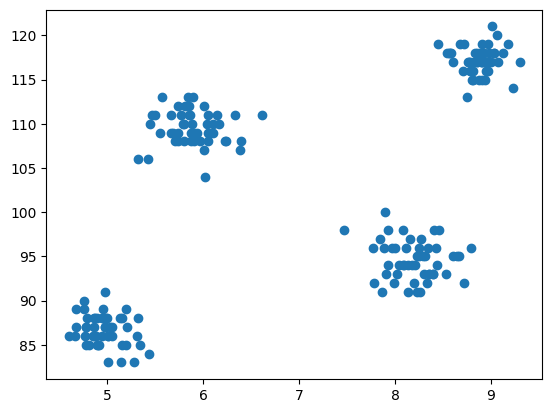

In [14]:
plt.scatter(df['cgpa'] , df['iq'])

In [19]:
class KMeans:
    def __init__(self,n_clusters=2,max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self,X):
        # init clusters
        random_index = random.sample(range(0,X.shape[0]),self.n_clusters)
        self.centroids = X[random_index]

        for i in range(self.max_iter):
            # assign clusters <-- array of cluster group name
            cluster_group = self.assign_clusters(X)
            old_centroids = self.centroids
            # move centroids  <-- list of co ordinate points that are now centroid
            self.centroids = self.move_centroids(X,cluster_group)
            # check finish
            if (old_centroids == self.centroids).all():
                break

        return cluster_group

    def assign_clusters(self,X):
        cluster_group = []
        distances = []

        for row in X:
            for centroid in self.centroids:
                # finding Euclidean distance for any dimension of point watch on copy
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()

        return np.array(cluster_group)

    def move_centroids(self,X,cluster_group):
        new_centroids = []

        cluster_type = np.unique(cluster_group)

        for type in cluster_type:
            new_centroids.append(X[cluster_group == type].mean(axis=0))

        return np.array(new_centroids)

In [16]:
x = df.iloc[:,:].values
x

array([[  5.13,  88.  ],
       [  5.9 , 113.  ],
       [  8.36,  93.  ],
       [  8.27,  97.  ],
       [  5.45, 110.  ],
       [  5.88, 109.  ],
       [  8.41,  98.  ],
       [  8.8 , 115.  ],
       [  5.79, 110.  ],
       [  8.09,  94.  ],
       [  4.6 ,  86.  ],
       [  6.1 , 110.  ],
       [  8.16,  97.  ],
       [  5.  ,  88.  ],
       [  5.71, 108.  ],
       [  8.31,  95.  ],
       [  5.5 , 111.  ],
       [  7.87,  91.  ],
       [  6.05, 111.  ],
       [  5.84, 113.  ],
       [  7.47,  98.  ],
       [  4.86,  86.  ],
       [  7.78,  92.  ],
       [  4.78,  87.  ],
       [  4.96,  88.  ],
       [  7.93,  98.  ],
       [  4.86,  87.  ],
       [  9.18, 119.  ],
       [  8.04,  94.  ],
       [  5.43, 106.  ],
       [  8.86, 117.  ],
       [  6.01, 112.  ],
       [  8.83, 118.  ],
       [  5.32, 106.  ],
       [  7.77,  96.  ],
       [  8.  ,  96.  ],
       [  8.56, 118.  ],
       [  5.91, 108.  ],
       [  5.44,  84.  ],
       [  5.57, 113.  ],


In [17]:
km = KMeans(n_clusters=4,max_iter=500)
y_means = km.fit_predict(x)
y_means

array([3, 1, 2, 2, 1, 1, 2, 0, 1, 2, 3, 1, 2, 3, 1, 2, 1, 2, 1, 1, 2, 3,
       2, 3, 3, 2, 3, 0, 2, 1, 0, 1, 0, 1, 2, 2, 0, 1, 3, 1, 3, 2, 2, 3,
       0, 0, 2, 1, 0, 1, 3, 3, 0, 2, 0, 1, 1, 0, 1, 0, 1, 2, 2, 0, 3, 0,
       2, 3, 1, 2, 1, 0, 2, 3, 1, 0, 1, 0, 3, 2, 2, 0, 1, 3, 0, 3, 0, 1,
       0, 1, 0, 0, 2, 3, 2, 2, 0, 2, 3, 0, 1, 3, 3, 0, 3, 3, 2, 3, 0, 0,
       2, 0, 1, 1, 2, 0, 2, 1, 0, 3, 3, 1, 2, 0, 2, 3, 2, 1, 3, 2, 2, 1,
       3, 3, 1, 0, 1, 3, 2, 2, 2, 3, 1, 3, 3, 0, 3, 0, 1, 3, 0, 3, 0, 0,
       3, 2, 1, 0, 1, 2, 3, 0, 1, 2, 0, 3, 1, 3, 3, 0, 0, 1, 0, 3, 3, 2,
       0, 1, 3, 0, 0, 1, 1, 1, 2, 3, 2, 2, 0, 1, 2, 2, 3, 3, 2, 3, 0, 1,
       1, 0])

0 , 1, 2, 3 is 4 cluster group numbers

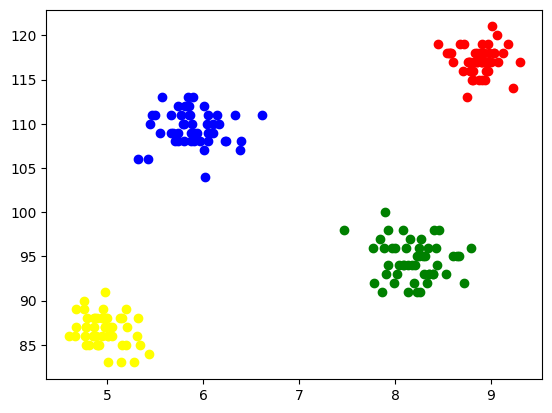

In [18]:
# plt.scatter(df['cgpa'] , df['iq'] , color = 'red')
plt.scatter(x[y_means == 0,0],x[y_means == 0,1],color='red')
plt.scatter(x[y_means == 1,0],x[y_means == 1,1],color='blue')
plt.scatter(x[y_means == 2,0],x[y_means == 2,1],color='green')
plt.scatter(x[y_means == 3,0],x[y_means == 3,1],color='yellow')
plt.show()